In [52]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from functions_and_objects import (impute_means_zeros_maxs_X,parse_percentage,
                                   clean_LC_data_classification_eval,preprocessing_eval, 
                                   columns_list, nan_max_cols, nan_mean_cols, nan_zero_cols, dtype,
                                   one_hot_encode_eval, concat_X_and_6ohe_dfs,
                                   prep_all_df_for_classification,
                                   classification_model_eval_prep_pipeline,
                                   current_pipeline)

import joblib
from sklearn.metrics import (accuracy_score, precision_score, recall_score, #classification
                             f1_score, roc_auc_score, roc_curve,precision_recall_fscore_support, #classification
                             r2_score,mean_squared_error) #regression

from sklearn.preprocessing import StandardScaler
from sklearn.calibration import calibration_curve
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras import metrics
from keras.utils import to_categorical

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Test Cleaning/Preprocessing Functions

In [2]:
raw_q42017 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2017Q4.csv',header=1)
raw_q32017 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2017Q3.csv',header=1)
raw_q22017 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2017Q2.csv',header=1)
raw_q12017 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2017Q1.csv',header=1)
raw_q42016 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2016Q4.csv',header=1)
raw_q32016 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2016Q3.csv',header=1)
raw_q22016 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2016Q2.csv',header=1)
raw_q12016 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2016Q1.csv',header=1)
raw_2015 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2015.csv',header=1)
raw_2014 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2014.csv',header=1)
raw_2012to2013 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2012to2013.csv',header=1)
raw_2007to2011 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2007to2011.csv',header=1)

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,118) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,19,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/

In [3]:
dfs_list = [raw_q42017,raw_q32017,raw_q22017,raw_q12017,
           raw_q42016,raw_q32016,raw_q22016,raw_q12016,raw_2015,
           raw_2014,raw_2012to2013, raw_2007to2011]

In [4]:
(X_train_classif, X_test_classif, y_train_classif, y_test_classif) = classification_model_eval_prep_pipeline(dfs_list)

/home/jupyter/peervest/functions_and_objects.py:243: FutureWarning: Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version
  raw_lc_df['earliest_cr_line'] = pd.to_timedelta(pd.to_datetime(raw_lc_df['earliest_cr_line'])).dt.days
/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/home/jupyter/peervest/functions_and_objects.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X_train[col] = X_train[col].fillna(0.0)
/home/jupyter/peervest/functions_and_objects.py:197: Setti

In [5]:
print(X_train_classif.shape)
print(y_train_classif.shape)
print(X_test_classif.shape)
print(y_test_classif.shape)

(880950, 1108)
(880950, 1)
(377551, 1108)
(377551, 1)


### Neural Network Classification Model

##### Fit

In [6]:
ss = StandardScaler()
X_train_classif_s = ss.fit_transform(X_train_classif)
X_test_classif_s = ss.transform(X_test_classif)

In [7]:
X_train_classif_s

array([[ 0.62121525,  0.62250523,  0.91077999, ..., -0.043633  ,
        -0.05705072, -0.03939376],
       [ 0.04623632,  0.04726958, -0.42602655, ..., -0.043633  ,
        -0.05705072, -0.03939376],
       [ 0.16123211,  0.16231671,  0.27184228, ..., -0.043633  ,
        -0.05705072, -0.03939376],
       ...,
       [-1.00022532, -0.99965929, -0.86988914, ..., -0.043633  ,
        -0.05705072, -0.03939376],
       [ 0.27622789,  0.27736384, -0.3839326 , ..., -0.043633  ,
        -0.05705072, -0.03939376],
       [ 0.39122368,  0.39241097,  0.45438799, ..., -0.043633  ,
        -0.05705072, -0.03939376]])

In [8]:
X_train_classif_s = X_train_classif_s.astype('float32')

In [9]:
X_test_classif_s = X_test_classif_s.astype('float32')

In [10]:
np.array(y_train_classif['loan_status'])

array([1, 0, 1, ..., 1, 0, 1], dtype=object)

In [11]:
y_train_classif['loan_status'] = y_train_classif['loan_status'].astype(int)
y_test_classif['loan_status'] = y_test_classif['loan_status'].astype(int)

In [12]:
y_train_classif_softmax = to_categorical(np.array(y_train_classif['loan_status']),num_classes=None)
y_test_classif_softmax = to_categorical(np.array(y_test_classif['loan_status']),num_classes=None)

In [15]:
y_train_classif_softmax

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [98]:
model = Sequential()
n_input = X_train_classif_s.shape[1]
n_hidden = n_input

model.add(Dense(n_hidden, input_dim=n_input, activation='sigmoid',kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(rate=0.2))
model.add(Dense(1000,activation='sigmoid',kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(100,activation='sigmoid',kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(50,activation='sigmoid',kernel_regularizer=regularizers.l2(0.001))) #l2 = 0.001
model.add(Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.001)))#l2 = 0.001

In [99]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy']) #try binary_accuracy for v6?

In [100]:
early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-06, patience=0, verbose=1, mode='auto')
callbacks_list = [early_stop]

In [102]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train_classif),
                                                  y=y_train_classif['loan_status'])

In [103]:
history_log = model.fit(X_train_classif_s, y_train_classif, 
                        validation_data=(X_test_classif_s, y_test_classif), 
                        epochs=7, 
                        callbacks=callbacks_list, 
                        batch_size=10000,class_weight=class_weights)

Train on 880950 samples, validate on 377551 samples
Epoch 1/7
880950/880950 [==============================] - 186s 211us/step - loss: 0.6614 - acc: 0.7986 - val_loss: 0.5792 - val_acc: 0.8051
Epoch 2/7
880950/880950 [==============================] - 182s 206us/step - loss: 0.5555 - acc: 0.8057 - val_loss: 0.5394 - val_acc: 0.8051
Epoch 3/7
880950/880950 [==============================] - 186s 211us/step - loss: 0.5292 - acc: 0.8057 - val_loss: 0.5221 - val_acc: 0.8051
Epoch 4/7
880950/880950 [==============================] - 183s 208us/step - loss: 0.4483 - acc: 0.8355 - val_loss: 0.2877 - val_acc: 0.9045
Epoch 5/7
880950/880950 [==============================] - 183s 207us/step - loss: 0.1792 - acc: 0.9569 - val_loss: 0.1532 - val_acc: 0.9666
Epoch 6/7
880950/880950 [==============================] - 181s 206us/step - loss: 0.1413 - acc: 0.9716 - val_loss: 0.1519 - val_acc: 0.9648
Epoch 7/7
880950/880950 [==============================] - 184s 209us/step - loss: 0.1287 - acc: 0.974

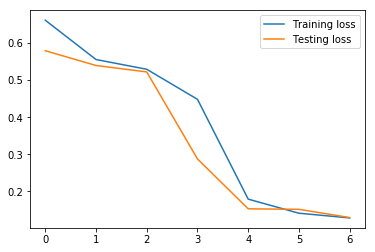

In [104]:
plt.plot(history_log.history['loss'], label='Training loss')
plt.plot(history_log.history['val_loss'], label='Testing loss')
plt.legend();

In [105]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 1108)              1228772   
_________________________________________________________________
dropout_17 (Dropout)         (None, 1108)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 1000)              1109000   
_________________________________________________________________
dense_43 (Dense)             (None, 100)               100100    
_________________________________________________________________
dense_44 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 51        
Total params: 2,442,973
Trainable params: 2,442,973
Non-trainable params: 0
_________________________________________________________________


In [106]:
y_test_classif_preds = model.predict_classes(X_test_classif_s)

In [107]:
y_test_classif_preds

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

In [108]:
nn_v6_class_preds_proba = model.predict_proba(X_test_classif_s)

In [109]:
nn_v6_class_preds_proba

array([[0.01563659],
       [0.98092324],
       [0.98790205],
       ...,
       [0.9823136 ],
       [0.9945533 ],
       [0.01563636]], dtype=float32)

(array([1122.,  982.,  800.,  765.,  669.,  604.,  578.,  528.,  494.,
         457.,  516.,  489.,  458.,  496.,  409.,  444.,  475.,  412.,
         450.,  453.,  446.,  434.,  440.,  433.,  433.,  446.,  447.,
         482.,  534.,  495.,  542.,  569.,  593.,  617.,  693.,  748.,
         732.,  813.,  882., 1013.]),
 array([0.1   , 0.1175, 0.135 , 0.1525, 0.17  , 0.1875, 0.205 , 0.2225,
        0.24  , 0.2575, 0.275 , 0.2925, 0.31  , 0.3275, 0.345 , 0.3625,
        0.38  , 0.3975, 0.415 , 0.4325, 0.45  , 0.4675, 0.485 , 0.5025,
        0.52  , 0.5375, 0.555 , 0.5725, 0.59  , 0.6075, 0.625 , 0.6425,
        0.66  , 0.6775, 0.695 , 0.7125, 0.73  , 0.7475, 0.765 , 0.7825,
        0.8   ], dtype=float32),
 <a list of 40 Patch objects>)

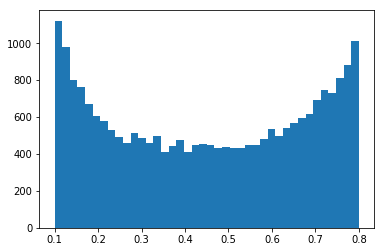

In [113]:
plt.hist(nn_v6_class_preds_proba,bins=40,range=(0.1,0.8))

### Try Isotonic Regression to calibrate

### Try sklearn Multilayer Perceptron

In [33]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 10, 5, 3))
mlp.fit(X_train_classif_s, y_train_classif)

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 5, 3), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [35]:
mlp.predict_proba(X_test_classif)[:,1]

array([3.17542749e-04, 9.99436945e-01, 9.99607318e-01, ...,
       9.99828606e-01, 9.99828606e-01, 1.15157216e-04])

##### Predict & Eval NN_v2

In [21]:
#print ("Precision Fully Paid: {}".format(precision_score(y_test_classif['loan_status'],y_test_classif_preds)))
#print ("Recall Fully Paid: {}".format(recall_score(y_test_classif['loan_status'],y_test_classif_preds)))
#print ("F-1 Score Fully Paid: {}".format(f1_score(y_test_classif['loan_status'],y_test_classif_preds)))
#print ("ROC-AUC Score: {}".format(roc_auc_score(y_test_classif['loan_status'],y_test_classif_preds)))

Precision Fully Paid: 0.9872847917296892
Recall Fully Paid: 0.9877719804983321
F-1 Score Fully Paid: 0.9875283260263971
ROC-AUC Score: 0.9676073977542289


In [22]:
#precision, recall, f1-score
#print ("Precision, Recall, F, & Support By Class [0,1] aka [Default,Fully Paid]: {}".format(
#    precision_recall_fscore_support(y_test_classif['loan_status'],y_test_classif_preds)))

#print ("Precision, Recall, F, & Support Weighted Average by Support: {}".format(
#    precision_recall_fscore_support(y_test_classif['loan_status'],y_test_classif_preds,average='weighted')))

Precision, Recall, F, & Support By Class [0,1] aka [Default,Fully Paid]: (array([0.94937829, 0.98728479]), array([0.94744282, 0.98777198]), array([0.94840957, 0.98752833]), array([ 73577, 303974]))
Precision, Recall, F, & Support Weighted Average by Support: (0.9798975874129687, 0.9799126475628458, 0.9799048766738255, None)


### Save NN_v2 Model to JobLib

- changed architecture of Neural Network with additional layers, added L2 regularization, dropout, and early stopping

In [ ]:
#filename = 'nn_v2.joblib'
#joblib.dump(model, filename)

##### Predict & Eval NN_v3

### Save NN_v3 Model to JobLib

- changed X_train_classif_s to type 'float32' to see whether this improved calibration
- larger batch size for speed of model.fit

In [26]:
#filename = 'nn_v3.joblib'
#joblib.dump(model, filename)

['nn_v3.joblib']

In [30]:
#print ("Precision Fully Paid: {}".format(precision_score(y_test_classif['loan_status'],y_test_classif_preds)))
#print ("Recall Fully Paid: {}".format(recall_score(y_test_classif['loan_status'],y_test_classif_preds)))
#print ("F-1 Score Fully Paid: {}".format(f1_score(y_test_classif['loan_status'],y_test_classif_preds)))
#print ("ROC-AUC Score: {}".format(roc_auc_score(y_test_classif['loan_status'],y_test_classif_preds)))

Precision Fully Paid: 0.9775323474744307
Recall Fully Paid: 0.9844624869232237
F-1 Score Fully Paid: 0.980985177912582
ROC-AUC Score: 0.9454910936865463


In [31]:
#precision, recall, f1-score
#print ("Precision, Recall, F, & Support By Class [0,1] aka [Default,Fully Paid]: {}".format(
#    precision_recall_fscore_support(y_test_classif['loan_status'],y_test_classif_preds)))

#print ("Precision, Recall, F, & Support Weighted Average by Support: {}".format(
#    precision_recall_fscore_support(y_test_classif['loan_status'],y_test_classif_preds,average='weighted')))

Precision, Recall, F, & Support By Class [0,1] aka [Default,Fully Paid]: (array([0.93387192, 0.97753235]), array([0.9065197 , 0.98446249]), array([0.91999255, 0.98098518]), array([ 73577, 303974]))
Precision, Recall, F, & Support Weighted Average by Support: (0.9690238186910873, 0.9692730253661095, 0.96909895734676, None)


### Save NN_v4 Model to JobLib

- changed hidden layer activation functions to Sigmoid instead of ReLU as ReLU pushes predict_proba to the extremes 0 and 1

In [29]:
filename = 'nn_v4.joblib'
joblib.dump(model, filename)

['nn_v4.joblib']

In [30]:
print ("Precision Fully Paid: {}".format(precision_score(y_test_classif['loan_status'],y_test_classif_preds)))
print ("Recall Fully Paid: {}".format(recall_score(y_test_classif['loan_status'],y_test_classif_preds)))
print ("F-1 Score Fully Paid: {}".format(f1_score(y_test_classif['loan_status'],y_test_classif_preds)))
print ("ROC-AUC Score: {}".format(roc_auc_score(y_test_classif['loan_status'],y_test_classif_preds)))

Precision Fully Paid: 0.9672634515743324
Recall Fully Paid: 0.997973510892379
F-1 Score Fully Paid: 0.9823785336439987
ROC-AUC Score: 0.9292163108779141


In [31]:
#precision, recall, f1-score
print ("Precision, Recall, F, & Support By Class [0,1] aka [Default,Fully Paid]: {}".format(
    precision_recall_fscore_support(y_test_classif['loan_status'],y_test_classif_preds)))

print ("Precision, Recall, F, & Support Weighted Average by Support: {}".format(
    precision_recall_fscore_support(y_test_classif['loan_status'],y_test_classif_preds,average='weighted')))

Precision, Recall, F, & Support By Class [0,1] aka [Default,Fully Paid]: (array([0.99036386, 0.96726345]), array([0.86045911, 0.99797351]), array([0.92085264, 0.98237853]), array([ 73577, 303974]))
Precision, Recall, F, & Support Weighted Average by Support: (0.9717652503223433, 0.9711747551986354, 0.970388389331882, None)


### Save NN_v5 Model to JobLib

- increased L2 regularization on last 2 layers to 0.001, 2 dropout layers
- changed model structure to 1000-100-50-1

In [85]:
filename = 'nn_v5.joblib'
joblib.dump(model, filename)

['nn_v5.joblib']

In [86]:
print ("Precision Fully Paid: {}".format(precision_score(y_test_classif['loan_status'],y_test_classif_preds)))
print ("Recall Fully Paid: {}".format(recall_score(y_test_classif['loan_status'],y_test_classif_preds)))
print ("F-1 Score Fully Paid: {}".format(f1_score(y_test_classif['loan_status'],y_test_classif_preds)))
print ("ROC-AUC Score: {}".format(roc_auc_score(y_test_classif['loan_status'],y_test_classif_preds)))

Precision Fully Paid: 0.9768404014244092
Recall Fully Paid: 0.9926704257600979
F-1 Score Fully Paid: 0.9846917963561841
ROC-AUC Score: 0.9477194769843206


In [87]:
#precision, recall, f1-score
print ("Precision, Recall, F, & Support By Class [0,1] aka [Default,Fully Paid]: {}".format(
    precision_recall_fscore_support(y_test_classif['loan_status'],y_test_classif_preds)))

print ("Precision, Recall, F, & Support Weighted Average by Support: {}".format(
    precision_recall_fscore_support(y_test_classif['loan_status'],y_test_classif_preds,average='weighted')))

Precision, Recall, F, & Support By Class [0,1] aka [Default,Fully Paid]: (array([0.96754599, 0.9768404 ]), array([0.90276853, 0.99267043]), array([0.93403549, 0.9846918 ]), array([ 73577, 303974]))
Precision, Recall, F, & Support Weighted Average by Support: (0.9750291106276529, 0.9751503770351555, 0.9748199144569333, None)


### ROC Curve nn_v5

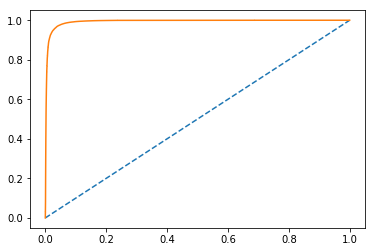

In [89]:
# keep probabilities for the positive outcome only
probs = nn_v5_class_preds_proba
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test_classif, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr)
# show the plot
plt.show()

### Probability Calibration nn_v5

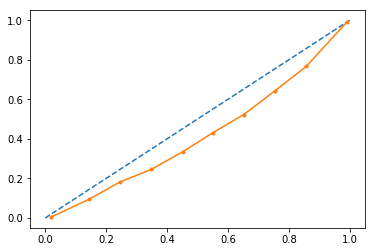

In [90]:
# reliability diagram
fop, mpv = calibration_curve(y_test_classif, nn_v5_class_preds_proba, n_bins=10)
# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
plt.plot(mpv, fop, marker='.')
plt.show()

### Save NN_v6 Model to JobLib

- Attempt to fix class imbalance: added class weights using sklearn's compute_class_weights in a 'balanced' way

In [114]:
filename = 'nn_v6.joblib'
joblib.dump(model, filename)

['nn_v6.joblib']

In [115]:
print ("Precision Fully Paid: {}".format(precision_score(y_test_classif['loan_status'],y_test_classif_preds)))
print ("Recall Fully Paid: {}".format(recall_score(y_test_classif['loan_status'],y_test_classif_preds)))
print ("F-1 Score Fully Paid: {}".format(f1_score(y_test_classif['loan_status'],y_test_classif_preds)))
print ("ROC-AUC Score: {}".format(roc_auc_score(y_test_classif['loan_status'],y_test_classif_preds)))

Precision Fully Paid: 0.9887225180050144
Recall Fully Paid: 0.976879601544869
F-1 Score Fully Paid: 0.982765382495983
ROC-AUC Score: 0.9654230971829976


In [116]:
#precision, recall, f1-score
print ("Precision, Recall, F, & Support By Class [0,1] aka [Default,Fully Paid]: {}".format(
    precision_recall_fscore_support(y_test_classif['loan_status'],y_test_classif_preds)))

print ("Precision, Recall, F, & Support Weighted Average by Support: {}".format(
    precision_recall_fscore_support(y_test_classif['loan_status'],y_test_classif_preds,average='weighted')))

Precision, Recall, F, & Support By Class [0,1] aka [Default,Fully Paid]: (array([0.90898495, 0.98872252]), array([0.95396659, 0.9768796 ]), array([0.93093272, 0.98276538]), array([ 73577, 303974]))
Precision, Recall, F, & Support Weighted Average by Support: (0.9731832904135708, 0.9724143228332066, 0.9726642529252664, None)


### ROC Curve nn_v6

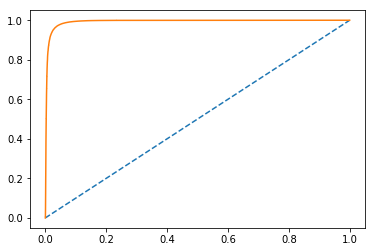

In [117]:
# keep probabilities for the positive outcome only
probs = nn_v6_class_preds_proba
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test_classif, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr)
# show the plot
plt.show()

### Probability Calibration nn_v6

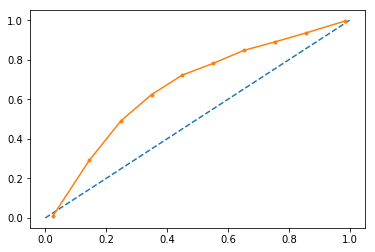

In [118]:
# reliability diagram
fop, mpv = calibration_curve(y_test_classif, nn_v6_class_preds_proba, n_bins=10)
# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
plt.plot(mpv, fop, marker='.')
plt.show()

In [119]:
from sklearn.isotonic import IsotonicRegression
ir = IsotonicRegression()

In [ ]:
ir.fit(results.predict,results.act)
results['iso'] = ir.predict(results.pred)

In [130]:
from sklearn.calibration import CalibratedClassifierCV
def calibrated(X_train_classif_s, X_test_classif_s, y_train_classif):
    # define and fit calibration model
    calibrated = CalibratedClassifierCV(model, method='sigmoid', cv='prefit')
    calibrated.fit(X_train_classif_s, y_train_classif)
    # predict probabilities
    return calibrated.predict_proba(X_test_classif_s)

In [131]:
calibrated(X_train_classif_s, X_test_classif_s, y_train_classif)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AttributeError: 'Sequential' object has no attribute 'classes_'

In [ ]:
# reliability diagram
fop, mpv = calibration_curve(y_test_classif, nn_v6_class_preds_proba, n_bins=10)
# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
plt.plot(mpv, fop, marker='.')
plt.show()